In [21]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('imt-ae-Carprice.csv')
data.head()

,Car_Name_,Year_,Selling_Price_,Present_Price_,Kms_Driven_,Fuel_Type_,Seller_Type_,Transmission_,Owner_
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [57]:
x = data.drop(['Car_Name_','Fuel_Type_','Seller_Type_','Transmission_'], axis=1)
x

,Year_,Selling_Price_,Present_Price_,Kms_Driven_,Owner_
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [26]:
x.describe()

,Year_,Selling_Price_,Present_Price_,Kms_Driven_,Owner_
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [34]:
y=x[["Year_","Selling_Price_"]]
pd.DataFrame(y)

,Year_,Selling_Price_
0,2014,3.35
1,2013,4.75
2,2017,7.25
3,2011,2.85
4,2014,4.60
...,...,...
296,2016,9.50
297,2015,4.00
298,2009,3.35
299,2017,11.50


In [74]:
kmeans = KMeans(n_clusters=3)
kmeans

KMeans(n_clusters=3)

In [75]:
from sklearn.preprocessing import MinMaxScaler

Scaller = MinMaxScaler()
Scaller.fit(x[["Year_"]])
x["Year_"]=Scaller.fit_transform(x[["Year_"]])

Scaller.fit(x[["Selling_Price_"]])
x["Selling_Price_"]=Scaller.fit_transform(x[["Selling_Price_"]])

Scaller.fit(x[["Present_Price_"]])
x["Present_Price_"]=Scaller.fit_transform(x[["Present_Price_"]])

Scaller.fit(x[["Kms_Driven_"]])
x["Kms_Driven_"]=Scaller.fit_transform(x[["Kms_Driven_"]])

Scaller.fit(x[["Owner_"]])
x["Owner_"]=Scaller.fit_transform(x[["Owner_"]])

In [76]:
y_predicted = kmeans.fit_predict(x)
x["cluster"] = y_predicted

In [77]:
x

,Year_,Selling_Price_,Present_Price_,Kms_Driven_,Owner_,cluster
0,0.733333,0.093123,0.057109,0.053053,0.0,0
1,0.666667,0.133238,0.099913,0.085085,0.0,0
2,0.933333,0.204871,0.103273,0.012813,0.0,0
3,0.533333,0.078797,0.041504,0.009409,0.0,0
4,0.733333,0.128940,0.070980,0.083984,0.0,0
...,...,...,...,...,...,...
296,0.866667,0.269341,0.122237,0.067043,0.0,0
297,0.800000,0.111748,0.060468,0.119119,0.0,1
298,0.400000,0.093123,0.115735,0.175043,0.0,1
299,0.933333,0.326648,0.131990,0.017017,0.0,2


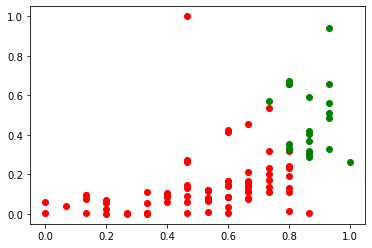

In [78]:
df1 = x[x["cluster"]==1]
df2 = x[x["cluster"]==2]
df3 = x[x["cluster"]==3]

plt.scatter(df1["Year_"],df1["Selling_Price_"],color="red")
plt.scatter(df2["Year_"],df2["Selling_Price_"],color="green")
plt.scatter(df3["Year_"],df3["Selling_Price_"],color="blue")

In [79]:
kmeans.cluster_centers_

array([[ 7.63875205e-01,  9.23454769e-02,  4.94733313e-02,
         4.58049182e-02,  1.31362890e-02, -6.66133815e-16],
       [ 5.19480519e-01,  1.37398132e-01,  1.18571091e-01,
         1.51918542e-01,  2.16450216e-02,  1.00000000e+00],
       [ 8.66666667e-01,  4.76845409e-01,  2.22180940e-01,
         4.60502407e-02,  0.00000000e+00,  2.00000000e+00]])